In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


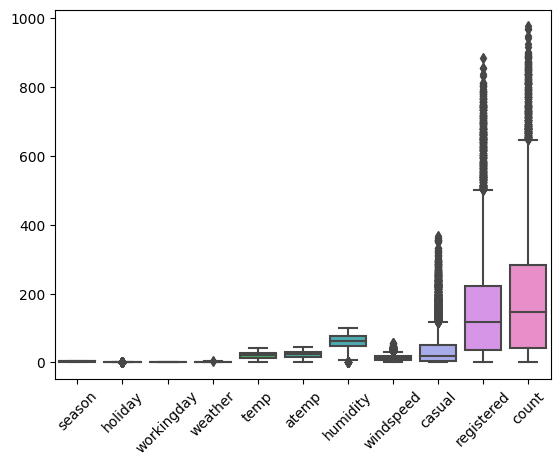

In [3]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday

C:\Users\Takodachi\AppData\Local\Temp\ipykernel_12756\4190298450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


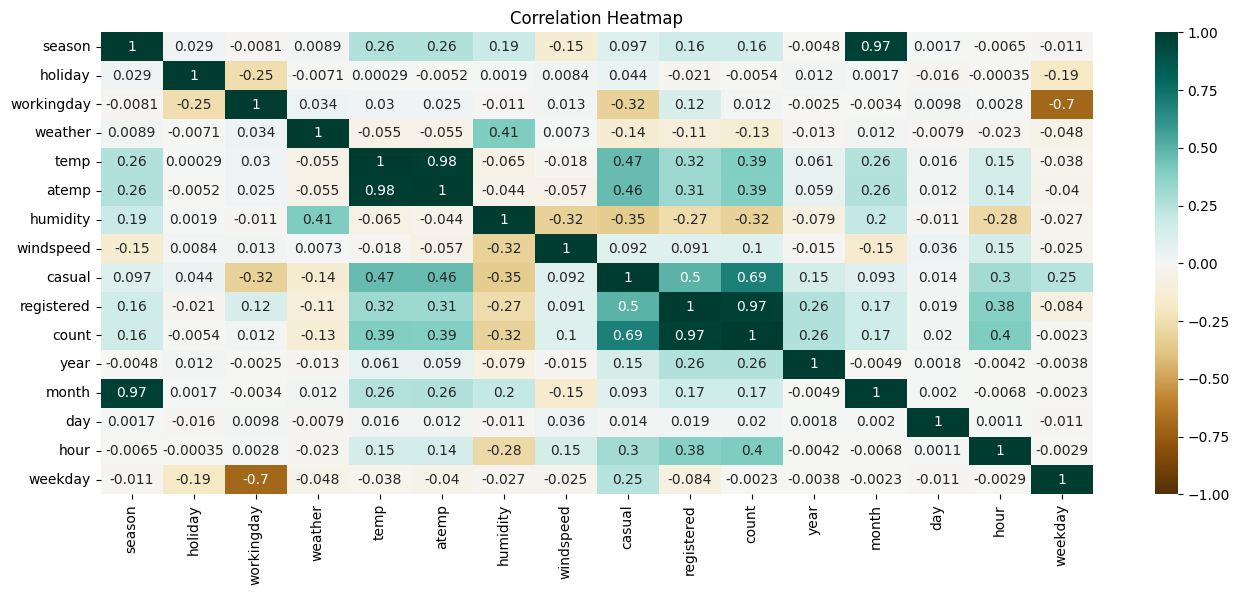

In [5]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title("Correlation Heatmap")
plt.show()

C:\Users\Takodachi\AppData\Local\Temp\ipykernel_12756\429411396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr()[['count']].sort_values(by='count', ascending=False),


Text(0.5, 1.0, 'Features Correlating with Sales Price')

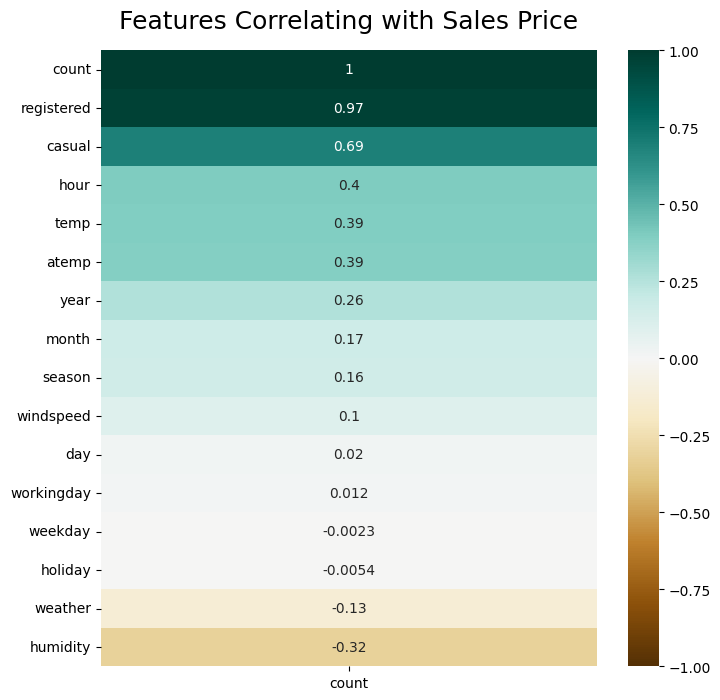

In [6]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(df.corr()[['count']].sort_values(by='count', ascending=False), 
                      vmin=-1, vmax=1, annot=True,cmap='BrBG')

heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)

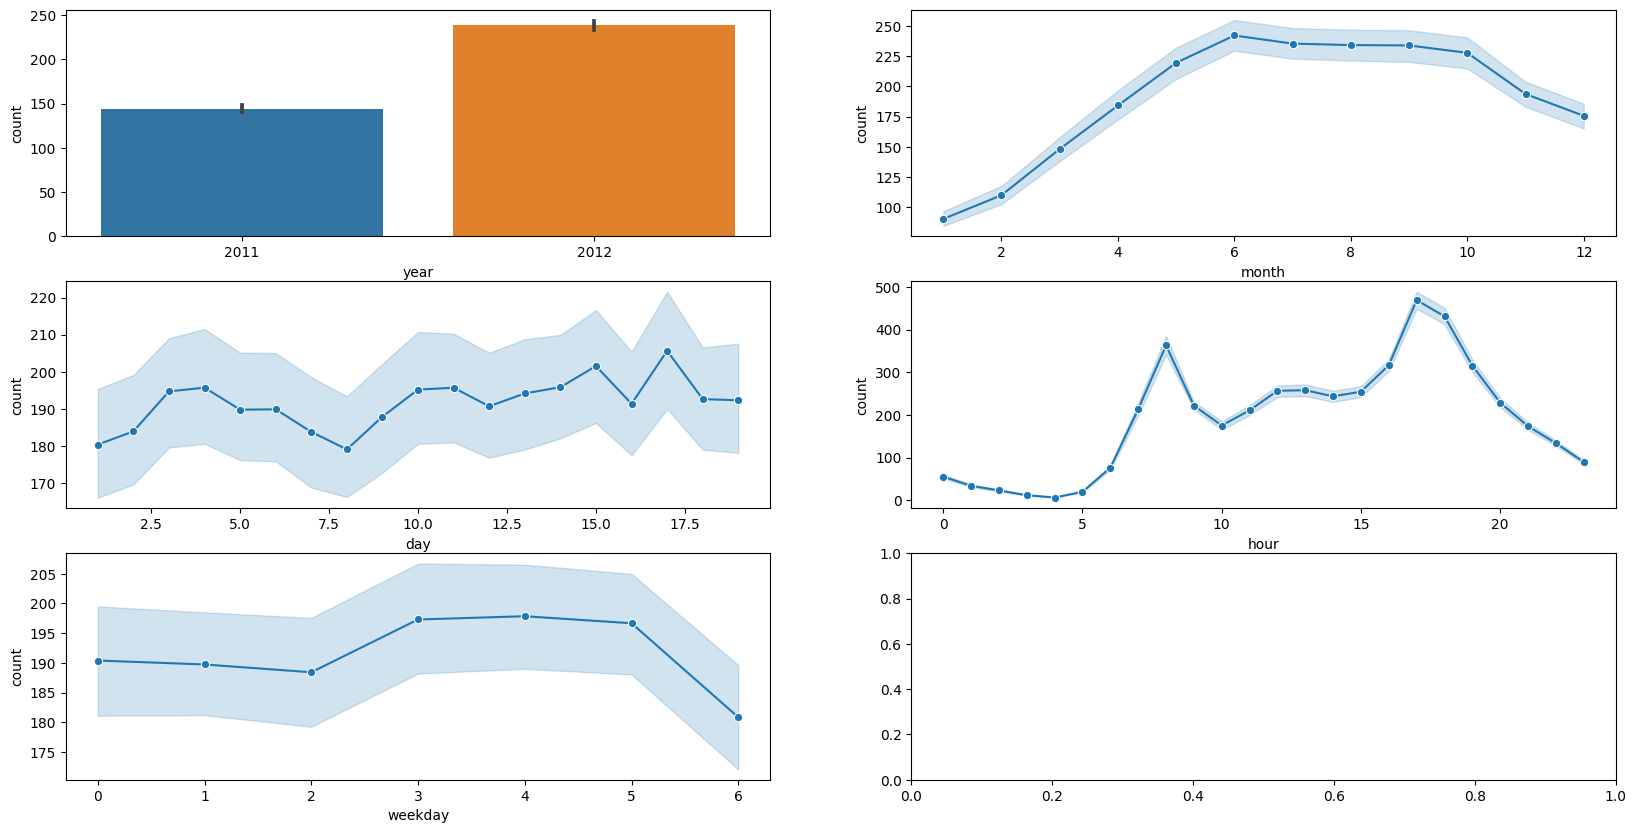

In [16]:
f, ax = plt.subplots(3, 2, figsize=(20, 10))

sns.barplot(x='year', y='count', data=df, ax=ax[0, 0])
sns.lineplot(x='month', y='count', data=df, ax=ax[0, 1], marker='o')
sns.lineplot(x='day', y='count', data=df, ax=ax[1, 0], marker='o')
sns.lineplot(x='hour', y='count', data=df, ax=ax[1, 1], marker='o')
sns.lineplot(x='weekday', y='count', data=df, ax=ax[2, 0], marker='o')

plt.show()


In [17]:
df['season'].replace([1,2,3,4], ['spring', 'summer', 'fall', 'winter'], inplace=True)
df['weather'].replace([1,2,3,4], ['clear','few cloud', 'little rain/snow', 'heavy rain/snow'],
                         inplace=True)

<AxesSubplot: xlabel='workingday', ylabel='count'>

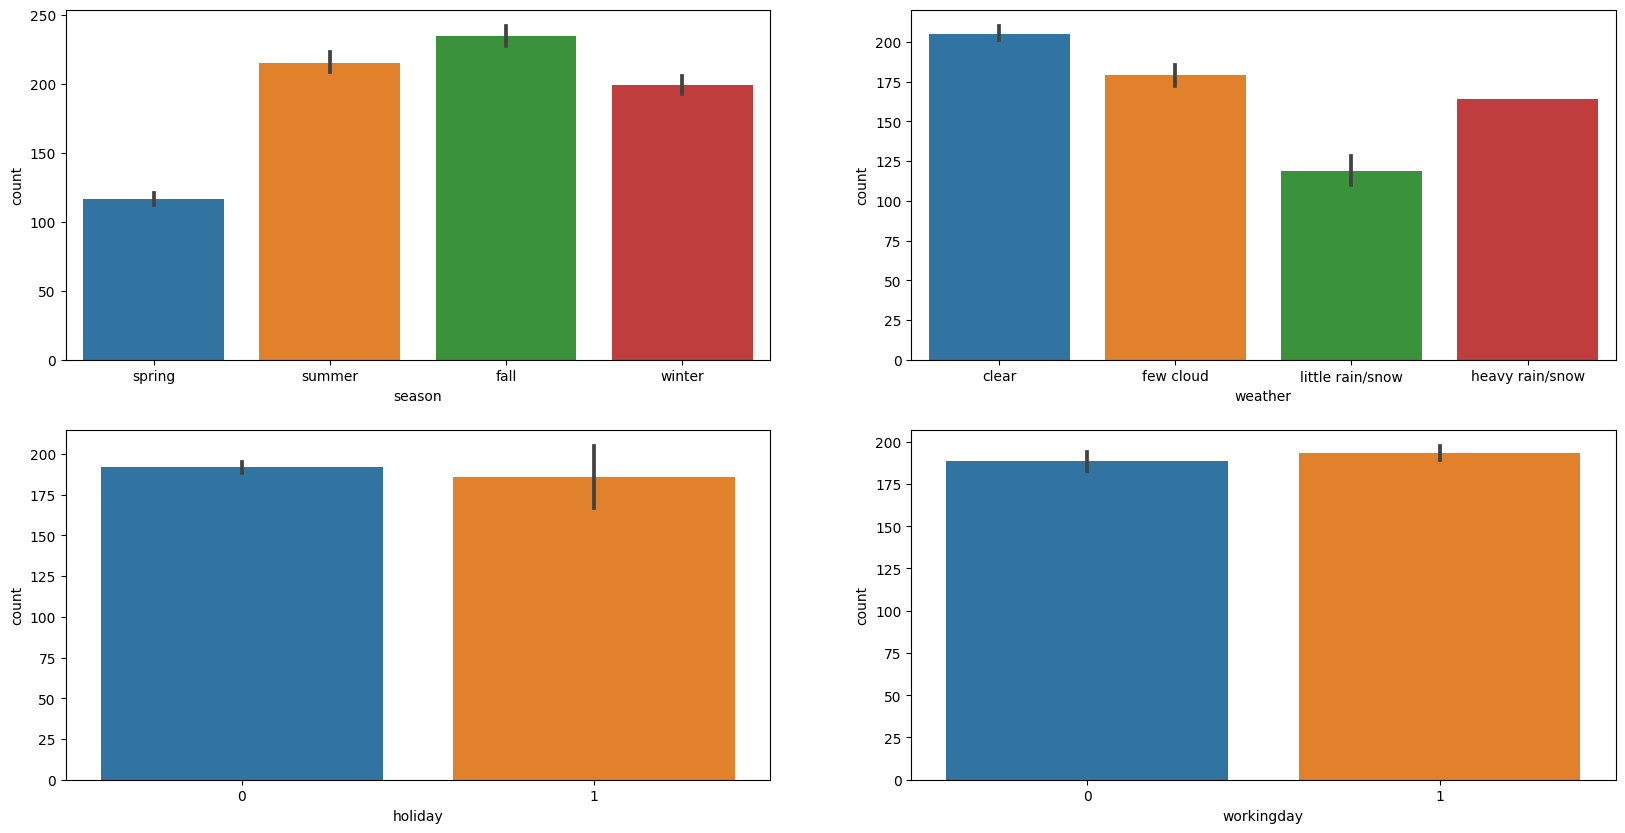

In [23]:
f, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.barplot(x='season', y='count', data=df, ax=ax[0,0])
sns.barplot(x='weather', y='count', data=df, ax=ax[0,1])
sns.barplot(x='holiday', y='count', data=df, ax=ax[1,0])
sns.barplot(x='workingday', y='count', data=df, ax=ax[1,1])

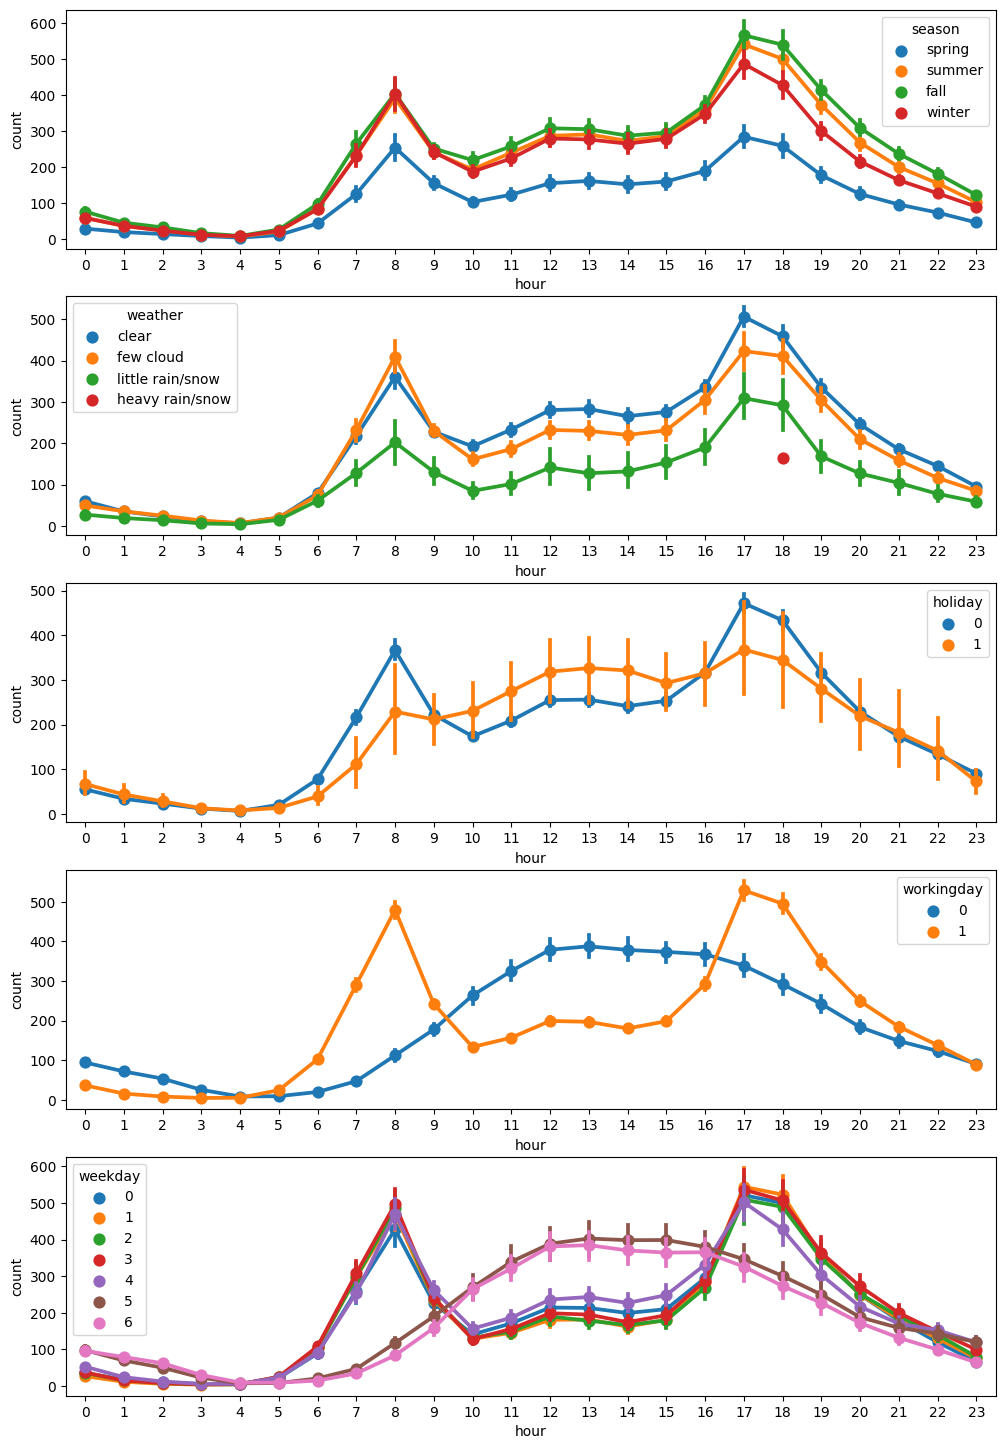

In [25]:
f, ax=plt.subplots(5, 1, figsize=(20,10))
f.set_size_inches(12, 18)
sns.pointplot(x='hour', y='count', data=df, hue='season', ax=ax[0])
sns.pointplot(x='hour', y='count', data=df, hue='weather', ax=ax[1])
sns.pointplot(x='hour', y='count', data=df, hue='holiday', ax=ax[2])
sns.pointplot(x='hour', y='count', data=df, hue='workingday', ax=ax[3])
sns.pointplot(x='hour', y='count', data=df, hue='weekday', ax=ax[4])
plt.show()